In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
  rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
  path = "c:/Windows/Fonts/malgun.ttf"
  font_name = font_manager.FontProperties(fname=path).get_name()
  rc('font', family=font_name)
elif platform.system() == 'Linux':
  plt.rc('font', family='NanumBarunGothic')
else:
  print('Unkown system..')

In [2]:
import pandas as pd
import os
import glob

fdir = './weather/'

fnames = glob.glob('./weather/*.csv')
fnames



['./weather\\부산_1904_1913.csv',
 './weather\\부산_1914_1923.csv',
 './weather\\부산_1924_1933.csv',
 './weather\\부산_1934_1943.csv',
 './weather\\부산_1944_1953.csv',
 './weather\\부산_1954_1963.csv',
 './weather\\부산_1964_1973.csv',
 './weather\\부산_1974_1983.csv',
 './weather\\부산_1984_1993.csv',
 './weather\\부산_1994_2003.csv',
 './weather\\부산_2004_2013.csv',
 './weather\\부산_2014_2022.csv',
 './weather\\서울_1904_1913.csv',
 './weather\\서울_1914_1923.csv',
 './weather\\서울_1924_1933.csv',
 './weather\\서울_1934_1943.csv',
 './weather\\서울_1944_1953.csv',
 './weather\\서울_1954_1963.csv',
 './weather\\서울_1964_1973.csv',
 './weather\\서울_1974_1983.csv',
 './weather\\서울_1984_1993.csv',
 './weather\\서울_1994_2003.csv',
 './weather\\서울_2004_2013.csv',
 './weather\\서울_2014_2022.csv']

In [3]:
# 첫번째 데이터 가져오기
df1=pd.read_csv(fnames[-1], encoding='cp949')
df1.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
0,108,서울,2014-01-01,4.0,0.3,7.9,0.0,7.8,3.7
1,108,서울,2014-01-02,1.5,-1.3,6.2,NaN,4.0,2.0
2,108,서울,2014-01-03,2.3,-1.1,7.3,NaN,5.4,2.5
3,108,서울,2014-01-04,-0.1,-3.7,5.6,NaN,4.7,2.4
4,108,서울,2014-01-05,-0.8,-4.3,3.8,NaN,4.4,1.9


In [4]:
df0=pd.DataFrame()

for fn in fnames:
    df1=pd.read_csv(fn, encoding='cp949')   # 순차적으로 데이터 읽어오기
    if fn[-3:] == "txt":
        continue    # for문의 다음 데이터로 넘어가기
    else:
        df0=pd.concat([df0, df1], ignore_index=True) # 두개의 파일 행 병합(추가)후 index 재설정

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86581 entries, 0 to 86580
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          86581 non-null  int64  
 1   지점명         86581 non-null  object 
 2   일시          86581 non-null  object 
 3   평균기온(°C)    86375 non-null  float64
 4   최저기온(°C)    86363 non-null  float64
 5   최고기온(°C)    86368 non-null  float64
 6   일강수량(mm)    33704 non-null  float64
 7   최대 풍속(m/s)  86155 non-null  float64
 8   평균 풍속(m/s)  86307 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 5.9+ MB


In [6]:
df0[df0['평균기온(°C)'].isnull()]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
58723,108,서울,1950-09-01,NaN,NaN,NaN,0.0,NaN,NaN
58724,108,서울,1950-09-03,NaN,NaN,NaN,0.0,NaN,NaN
58725,108,서울,1950-09-04,NaN,NaN,NaN,2.3,NaN,NaN
58726,108,서울,1950-09-05,NaN,NaN,NaN,53.0,NaN,NaN
58727,108,서울,1950-09-08,NaN,NaN,NaN,2.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...
58924,108,서울,1953-11-23,NaN,NaN,NaN,0.0,NaN,NaN
58925,108,서울,1953-11-24,NaN,NaN,NaN,0.0,NaN,NaN
58926,108,서울,1953-11-25,NaN,NaN,NaN,0.0,NaN,NaN
58927,108,서울,1953-11-26,NaN,NaN,NaN,1.7,NaN,NaN


In [8]:
# 특정 열에 NaN이 존재하는 모든 행 삭제
df1=df0.dropna(subset=['평균기온(°C)'])
print(df0.shape, df1.shape)

(86581, 9) (86375, 9)


In [9]:
df1.isnull().sum()

지점                0
지점명               0
일시                0
평균기온(°C)          0
최저기온(°C)         12
최고기온(°C)          7
일강수량(mm)      52877
최대 풍속(m/s)      220
평균 풍속(m/s)       68
dtype: int64

In [10]:
df1.fillna(0)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
0,159,부산,1904-04-09,11.3,7.8,16.1,14.8,12.3,9.6
1,159,부산,1904-04-10,9.3,4.7,15.2,0.0,8.4,4.3
2,159,부산,1904-04-11,10.6,0.0,14.9,1.0,6.0,3.7
3,159,부산,1904-04-12,11.3,8.8,13.4,1.8,7.1,6.3
4,159,부산,1904-04-13,14.5,11.1,16.9,1.5,8.6,5.5
...,...,...,...,...,...,...,...,...,...
86576,108,서울,2022-02-11,2.9,-2.6,8.8,0.0,3.5,1.8
86577,108,서울,2022-02-12,4.8,-0.1,10.4,0.0,3.8,1.7
86578,108,서울,2022-02-13,4.8,1.6,9.5,0.0,3.5,1.8
86579,108,서울,2022-02-14,2.5,-1.3,8.1,1.7,5.7,2.9


In [11]:
# 일일 강수량 NaN을 0으로 채우기
df1['일강수량(mm)']=df1['일강수량(mm)'].fillna(0)
df1

C:\Users\edu12\AppData\Local\Temp\ipykernel_6308\212976007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['일강수량(mm)']=df1['일강수량(mm)'].fillna(0)


,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
0,159,부산,1904-04-09,11.3,7.8,16.1,14.8,12.3,9.6
1,159,부산,1904-04-10,9.3,4.7,15.2,0.0,8.4,4.3
2,159,부산,1904-04-11,10.6,NaN,14.9,1.0,6.0,3.7
3,159,부산,1904-04-12,11.3,8.8,13.4,1.8,7.1,6.3
4,159,부산,1904-04-13,14.5,11.1,16.9,1.5,8.6,5.5
...,...,...,...,...,...,...,...,...,...
86576,108,서울,2022-02-11,2.9,-2.6,8.8,0.0,3.5,1.8
86577,108,서울,2022-02-12,4.8,-0.1,10.4,0.0,3.8,1.7
86578,108,서울,2022-02-13,4.8,1.6,9.5,0.0,3.5,1.8
86579,108,서울,2022-02-14,2.5,-1.3,8.1,1.7,5.7,2.9


In [14]:
df1.isna().sum()

지점              0
지점명             0
일시              0
평균기온(°C)        0
최저기온(°C)       12
최고기온(°C)        7
일강수량(mm)        0
최대 풍속(m/s)    220
평균 풍속(m/s)     68
dtype: int64

In [13]:
df1[df1['최저기온(°C)'].isna()]
df1.loc[45178:45180]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
45178,108,서울,1913-08-01,26.2,23.1,31.7,0.0,2.2,1.9
45179,108,서울,1913-08-02,25.6,22.0,31.5,0.0,3.0,2.1
45180,108,서울,1913-08-03,22.8,17.4,28.9,0.0,4.6,2.7


In [15]:
# 앞 행에 있는 데이터로 채우기
df1['최저기온(°C)']=df1['최저기온(°C)'].fillna(method='pad')

# 뒤 행에 있는 데이터로 채우기
df1['최고기온(°C)']=df1['최고기온(°C)'].fillna(method='bfill')

df1.loc[45178:45180]

C:\Users\edu12\AppData\Local\Temp\ipykernel_6308\35077219.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['최저기온(°C)']=df1['최저기온(°C)'].fillna(method='pad')
C:\Users\edu12\AppData\Local\Temp\ipykernel_6308\35077219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['최저기온(°C)']=df1['최저기온(°C)'].fillna(method='pad')
C:\Users\edu12\AppData\Local\Temp\ipykernel_6308\35077219.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['최고기온(°C)']=df1['최고기온(°C)'].fillna(method='bfill')
C:\Users\edu12\AppData\Local\Temp\ipykernel_6308\35077219.py:5: SettingWithCopyWarning:

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
45178,108,서울,1913-08-01,26.2,23.1,31.7,0.0,2.2,1.9
45179,108,서울,1913-08-02,25.6,22.0,31.5,0.0,3.0,2.1
45180,108,서울,1913-08-03,22.8,17.4,28.9,0.0,4.6,2.7


In [17]:
import numpy as np
# 최대풍속 평균 계산후 소수 첫째자리까지 출력
mn=np.round(df1['최대 풍속(m/s)'].mean(), 1)
print(mn)
df1['최대 풍속(m/s)']=df1['최대 풍속(m/s)'].fillna(mn)

df1.loc[45178:45180]

6.8


C:\Users\edu12\AppData\Local\Temp\ipykernel_6308\864588644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['최대 풍속(m/s)']=df1['최대 풍속(m/s)'].fillna(mn)


,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
45178,108,서울,1913-08-01,26.2,23.1,31.7,0.0,2.2,1.9
45179,108,서울,1913-08-02,25.6,22.0,31.5,0.0,3.0,2.1
45180,108,서울,1913-08-03,22.8,17.4,28.9,0.0,4.6,2.7


In [18]:
mn=np.round(df1['평균 풍속(m/s)'].mean(), 1)
df1['평균 풍속(m/s)']=df1['평균 풍속(m/s)'].fillna(mn)

df1.isna().sum()

C:\Users\edu12\AppData\Local\Temp\ipykernel_6308\1600656146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['평균 풍속(m/s)']=df1['평균 풍속(m/s)'].fillna(mn)


지점            0
지점명           0
일시            0
평균기온(°C)      0
최저기온(°C)      0
최고기온(°C)      0
일강수량(mm)      0
최대 풍속(m/s)    0
평균 풍속(m/s)    0
dtype: int64

In [19]:
df1=df1.drop('지점', axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86375 entries, 0 to 86580
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         86375 non-null  object 
 1   일시          86375 non-null  object 
 2   평균기온(°C)    86375 non-null  float64
 3   최저기온(°C)    86375 non-null  float64
 4   최고기온(°C)    86375 non-null  float64
 5   일강수량(mm)    86375 non-null  float64
 6   최대 풍속(m/s)  86375 non-null  float64
 7   평균 풍속(m/s)  86375 non-null  float64
dtypes: float64(6), object(2)
memory usage: 7.9+ MB


In [25]:
df1.columns=['지점명', '일시', '평균기온', '최저기온', '최고기온', '일강수량','최대풍속', '평균풍속']
df1.columns

Index(['지점명', '일시', '평균기온', '최저기온', '최고기온', '일강수량', '최대풍속', '평균풍속'], dtype='object')

In [26]:
# 행 전체가 중복인 데이터 개수 확인
df1.duplicated().sum()

np.int64(0)

In [30]:
# 특정 필드의 중복 데이터 개수
df1['지점명'].unique()

array(['부산', '서울', '관악산'], dtype=object)

In [32]:
df1 = df1[df1['지점명'] == '서울']
df1.shape

(40590, 8)

In [33]:
df1['지점명'].duplicated().sum()

np.int64(40589)

In [34]:
# 행 전체가 중복인 데이터 모두 제거(첫번째 데이터만 남겨둠)
df1.drop_duplicates()

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
43047,서울,1907-10-01,13.5,7.9,20.7,0.0,3.7,2.5
43048,서울,1907-10-02,16.2,7.9,22.0,0.2,2.2,1.1
43049,서울,1907-10-03,16.2,13.1,21.3,2.4,6.2,2.3
43050,서울,1907-10-04,16.5,11.2,22.0,0.0,1.7,1.3
43051,서울,1907-10-05,17.6,10.9,25.4,0.0,2.4,1.7
...,...,...,...,...,...,...,...,...
86576,서울,2022-02-11,2.9,-2.6,8.8,0.0,3.5,1.8
86577,서울,2022-02-12,4.8,-0.1,10.4,0.0,3.8,1.7
86578,서울,2022-02-13,4.8,1.6,9.5,0.0,3.5,1.8
86579,서울,2022-02-14,2.5,-1.3,8.1,1.7,5.7,2.9


In [36]:
df1.describe()

,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속
count,40590.000000,40590.000000,40590.000000,40590.000000,40590.000000,40590.000000
mean,11.743984,7.451550,16.749283,3.629929,5.282971,2.415413
std,10.660366,10.886034,10.981815,13.955639,2.041082,1.099574
min,-19.200000,-23.100000,-16.300000,0.000000,0.000000,0.100000
25%,2.700000,-1.400000,7.200000,0.000000,3.900000,1.700000
50%,12.900000,8.000000,18.600000,0.000000,5.000000,2.200000
75%,21.200000,17.100000,26.300000,0.400000,6.300000,2.900000
max,33.700000,30.300000,39.600000,354.700000,25.000000,10.500000


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
c:\Users\edu12\miniconda3\envs\kcia1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\edu12\miniconda3\envs\kcia1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SY

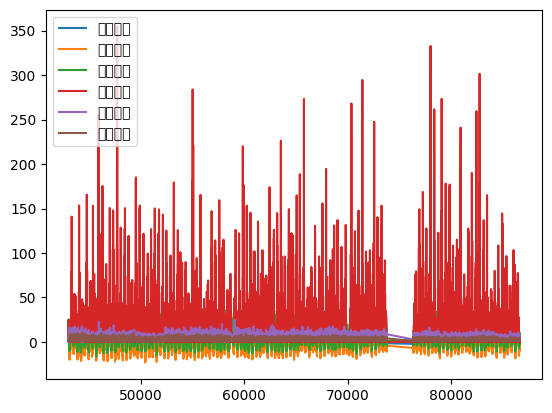

In [38]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

df1.plot()
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

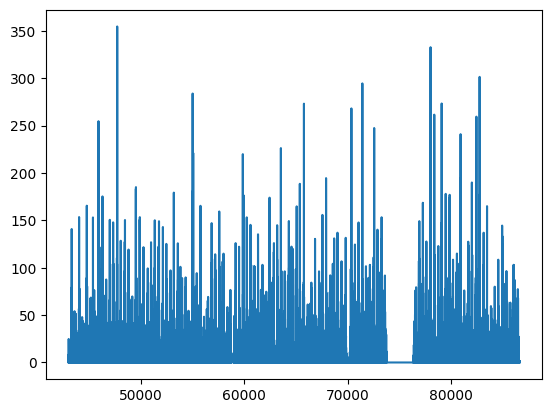

In [39]:
df1['일강수량'].plot()
plt.show()

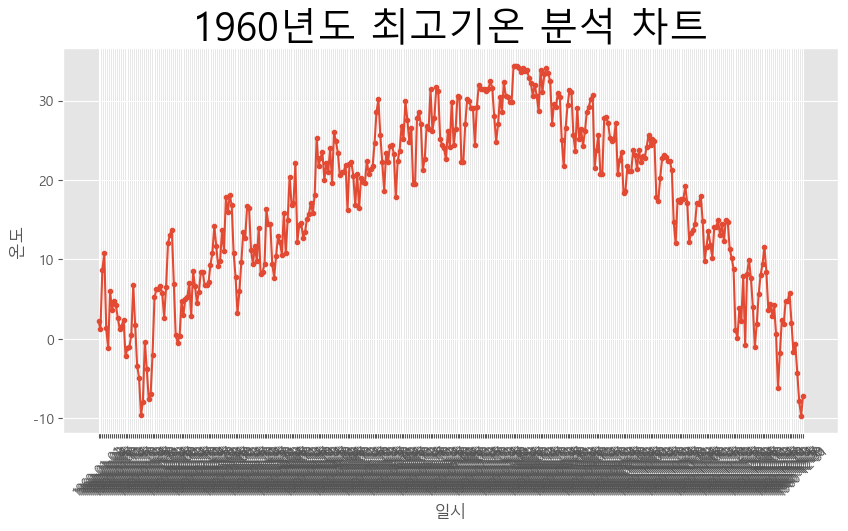

In [42]:
plt_df1=df1[(df1['일시']>="1960-01-01") & (df1['일시']<="1960-12-31")]

# 차트 환경 설정
plt.style.use("ggplot")  # 스타일 선택
plt.figure(figsize=(10, 5))  # 차트 사이즈
plt.xticks(size=9, rotation=45)

# 차트 출력
plt.plot(plt_df1['일시'], plt_df1['최고기온'], marker="o", markersize=3) # x축: 일시, y축: 최고기온
plt.title('1960년도 최고기온 분석 차트', size=28)  # 제목 입력, 글자크기 28
plt.xlabel('일시')
plt.ylabel('온도')
plt.show()

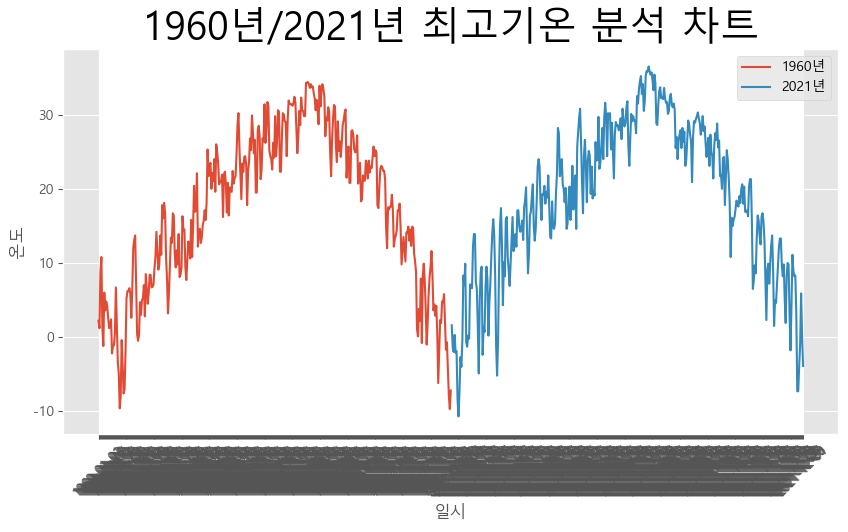

In [45]:
# 한개의 차트에 두 데이터 표시
plt_df1=df1[(df1['일시']>="1960-01-01") & (df1['일시']<="1960-12-31")]
plt_df2=df1[(df1['일시']>="2021-01-01") & (df1['일시']<="2021-12-31")]

# 차트 환경 설정
plt.style.use("ggplot")  # 스타일 선택
plt.figure(figsize=(10, 5))  # 차트 사이즈
plt.xticks(size=9, rotation=45)

# 차트 출력
plt.plot(plt_df1['일시'], plt_df1['최고기온'], label='1960년') # label: 범례
plt.plot(plt_df2['일시'], plt_df2['최고기온'], label='2021년')

plt.title('1960년/2021년 최고기온 분석 차트', size=28)  # 제목 입력, 글자크기 28
plt.xlabel('일시')
plt.ylabel('온도')
plt.legend()
plt.show()

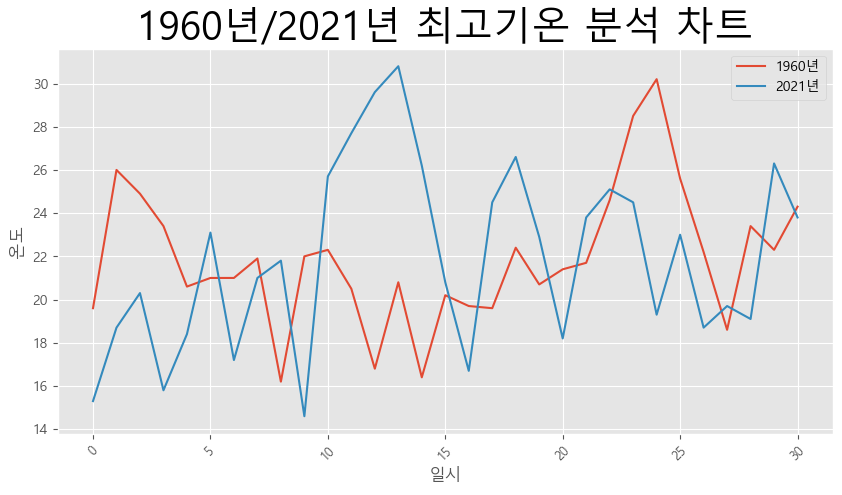

In [47]:
# 한개의 차트에 두 데이터 표시
# 원하는 데이터 추출
plt_df1=df1[(df1['일시']>="1960-05-01") & (df1['일시']<="1960-05-31")]
plt_df2=df1[(df1['일시']>="2021-05-01") & (df1['일시']<="2021-05-31")]

# 추출한 데이터에 대한 index 재설정
plt_df1=plt_df1.reset_index(drop=True)
plt_df2=plt_df2.reset_index(drop=True)

# 차트 환경 설정
plt.style.use("ggplot")  # 스타일 선택
plt.figure(figsize=(10, 5))  # 차트 사이즈
plt.xticks(size=9, rotation=45)

# 차트 출력
plt.plot(plt_df1.index, plt_df1['최고기온'], label='1960년') # label: 범례
plt.plot(plt_df2.index, plt_df2['최고기온'], label='2021년')

plt.title('1960년/2021년 최고기온 분석 차트', size=28)  # 제목 입력, 글자크기 28
plt.xlabel('일시')
plt.ylabel('온도')
plt.legend()
plt.show()

In [52]:
# DataFrame에서 직접 적용
df1['년']=df1['일시'].str.split("-").str[0]
df1['월']=df1['일시'].str.split("-").str[1]

display(df1.head(3))
display(df1.tail(3))

,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속,년,월
43047,서울,1907-10-01,13.5,7.9,20.7,0.0,3.7,2.5,1907,10
43048,서울,1907-10-02,16.2,7.9,22.0,0.2,2.2,1.1,1907,10
43049,서울,1907-10-03,16.2,13.1,21.3,2.4,6.2,2.3,1907,10


,지점명,일시,평균기온,최저기온,최고기온,일강수량,최대풍속,평균풍속,년,월
86578,서울,2022-02-13,4.8,1.6,9.5,0.0,3.5,1.8,2022,02
86579,서울,2022-02-14,2.5,-1.3,8.1,1.7,5.7,2.9,2022,02
86580,서울,2022-02-15,-4.7,-7.7,-1.3,0.0,5.7,3.8,2022,02
